<a href="https://colab.research.google.com/github/VictorFrancheto/Complex_Network/blob/main/lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando a biblioteca `graph-tool`(https://graph-tool.skewed.de)

---

In [1]:
!mkdir -p /etc/apt/keyrings; mkdir -p ~/.gnupg; chmod 700 ~/.gnupg
!gpg --no-default-keyring --keyring /etc/apt/keyrings/skewed.de.gpg --keyserver keyserver.ubuntu.com --recv-keys 612DEFB798507F25
!echo "deb [signed-by=/etc/apt/keyrings/skewed.de.gpg] https://downloads.skewed.de/apt $(lsb_release -s -c) main" > /etc/apt/sources.list.d/skewed.list
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

gpg: key 612DEFB798507F25: "Tiago de Paula Peixoto <tiago@skewed.de>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://downloads.skewed.de/apt jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W:

In [2]:
# O Colab usa uma instalação Python diferente da do sistema! Colaboração ruim! Precisamos de algumas soluções alternativas.
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following packages will be REMOVED:
  python3-cairo*
0 upgraded, 0 newly installed, 1 to remove and 65 not upgraded.
After this operation, 310 kB disk space will be freed.
(Reading database ... 132759 files and directories currently installed.)
Removing python3-cairo:amd64 (1.20.1-3build1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-5ubuntu2).
pkg-config is already the newest version (0.29.2-1ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgr

### Agora podemos usar a ferramenta gráfica como qualquer outro módulo Python

In [3]:
import graph_tool.all as gt

# Redes Complexas
---

Redes selecionadas:

https://networks.skewed.de/net/fresh_webs#fn:icon

**Descrição:**
Um conjunto de 26 redes de interações entre espécies em diferentes níveis tróficos em riachos na Nova Zelândia, Maine e Carolina do Norte. As redes incluem a identificação de espécies de insetos aquáticos, algas e peixes, além de suas interações tróficas. Matrizes de adjacência em Excel e texto simples estão disponíveis; as redes podem ser baixadas individualmente ou em grupo.

**Citação:** R.M. Thompson and C.R. Townsend, "Impacts on stream food webs of native and exotic forest: an intercontinental comparison." Ecology 84, 145-161 (2003)., https://doi.org/10.1890/0012-9658(2003)084[0145:iosfwo]2.0.co;2 [@sci-hub]

----

https://networks.skewed.de/net/bitcoin_alpha

**Descrição:** Uma rede de relacionamentos de quem-confia-em-quém entre os usuários da plataforma **Bitcoin Alpha**. Cada aresta direcionada $(i, j, w)$ representa a avaliação do usuário $j$ pelo usuário $i$, na qual $i$ atribui a $j$ um peso $w$ em uma escala de $-10$ (total desconfiança) a $+10$ (total confiança) em passos de $1,1$.

**Citação:**
S. Kumar, F. Spezzano, V.S. Subrahmanian, and C. Faloutsos, "Edge weight prediction in weighted signed networks." IEEE 16th International Conference on Data Mining (ICDM), 221-230 (2016), https://doi.org/10.1109/icdm.2016.0033 [@sci-hub]

---
https://networks.skewed.de/net/7th_graders

**Descrição:** Uma pequena rede complexa de amizades entre $29$ alunos do sétimo ano em Victoria, Austrália. Os alunos indicaram colegas para três atividades diferentes (com quem você se dá bem na classe, quem são seus melhores amigos e com quem você preferiria trabalhar). A direção da aresta para cada um desses três tipos de arestas indica se o nó $i$ nomeou o nó $j$, e o peso da aresta indica a frequência dessa nomeação. Os alunos de 1 a 12 são meninos e os de 13 a 29 são meninas.

**Citação:** M. Vickers and S. Chan, "Representing Classroom Social Structure." Melbourne: Victoria Institute of Secondary Education, (1981)



### Importando bibliotecas

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

**Exercício 1.** Caracterizar as redes selecionadas mencionando de onde elas foram obtidas, qual o significado dos vértices e arestas, o que a rede modela (pra que ela é usada em algum estudo). Calcular o número de vértices e arestas.


# Função para ler as redes e calculas os nós e arestas

In [5]:
def convert_graph_tool_to_networkx(gt_graph):
    """
    Converte um grafo do Graph-tool para NetworkX, mantendo a direção das arestas
    e verifica se é acíclico.

    Parâmetros:
    gt_graph (GraphTool Graph): Grafo do Graph-tool.

    Retorna:
    G_nx (networkx.DiGraph): Grafo convertido para NetworkX.
    N (int): Número de nós no grafo.
    M (int): Número de arestas no grafo.
    aciclico (bool): Indica se o grafo é acíclico.
    """
    # Criando um grafo vazio do NetworkX
    G_nx = nx.DiGraph()

    # Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
    for edge in gt_graph.edges():
        G_nx.add_edge(edge.source(), edge.target())

    # Convertendo rótulos de nós para inteiros
    mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
    G_nx = nx.relabel_nodes(G_nx, mapeamento)

    # Obtendo o número de nós e arestas
    N = len(G_nx)
    M = G_nx.number_of_edges()

    # Verificando se o grafo é acíclico
    aciclico = nx.is_directed_acyclic_graph(G_nx)

    return G_nx, N, M, aciclico


#### Calculando o número de nós e arestas da rede `fresh_webs`

In [6]:
G_gt = gt.collection.ns["fresh_webs/AkatoreA"]
G_nx, N, M, aciclico = convert_graph_tool_to_networkx(G_gt)
print("Número de nós:", N)
print("Número de arestas:", M)
print(f"É acíclico: {aciclico}")

Número de nós: 84
Número de arestas: 227
É acíclico: True


#### Calculando o número de nós e arestas da rede `bitcoin_alpha`

In [7]:
G_gt = gt.collection.ns["bitcoin_alpha"]
G_nx, N, M, aciclico = convert_graph_tool_to_networkx(G_gt)
print("Número de nós:", N)
print("Número de arestas:", M)
print(f" É acíclico: {aciclico}")

Número de nós: 3783
Número de arestas: 24186
 É acíclico: False


#### Calculando o número de nós e arestas da rede `7th_graders`

In [8]:
# Importando a rede do Graph-tool
G_gt = gt.collection.ns["7th_graders"]
G_nx, N, M, aciclico = convert_graph_tool_to_networkx(G_gt)
print("Número de nós:", N)
print("Número de arestas:", M)
print(f" É acíclico: {aciclico}")

Número de nós: 29
Número de arestas: 376
 É acíclico: False


**Exercício 2.** Para cada rede selecionada, calcular a matriz de adjacências A (remover pesos caso necessário). Transformar a rede direcionada em não direcionada (i.e. transformar a matriz de adjacências de não simétrica para simétrica). Calcular $X = A^3$ e $X = A^4$. (i.e. multiplique as
matrizes de forma a gerar $A\cdot A\cdot A$ e $A\cdot A\cdot A\cdot A$). Mostrar: quantidade de elementos das matrizes $X$ e $Y$ que possuem valor não nulo.
**Opcional:** Verifique que o elemento $i, j$ da matriz $A^n$ representa o número de caminhos de comprimento $n$ entre os vértices $i$ e $j$.

# Função para transformar a rede direcionada em não direcionadas

In [9]:
def processar_grafo(gt_graph):
    """
    Converte um grafo do Graph-tool para NetworkX, removendo auto-laços, considerando
    apenas o maior componente conectado, transformando o grafo em não direcionado,
    e calcula a matriz adjacente e as potências dessa matriz.

    Parâmetros:
    gt_graph (GraphTool Graph): Grafo do Graph-tool.

    Retorna:
    A_potencia_n (np.ndarray): Matriz A^n após o cálculo.
    A_potencia_m (np.ndarray): Matriz A^m após o cálculo.
    """
    # Criando um grafo vazio do NetworkX
    G_nx = nx.DiGraph()

    # Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
    for edge in gt_graph.edges():
        G_nx.add_edge(edge.source(), edge.target())

    # Removendo auto-laços
    G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

    # Convertendo o grafo para não direcionado
    G_nx = G_nx.to_undirected()

    # Obtendo o maior componente conectado
    Gcc = sorted(nx.connected_components(G_nx), key=len, reverse=True)
    G_nx = G_nx.subgraph(Gcc[0]).copy()

    # Convertendo rótulos de nós para inteiros
    mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
    G_nx = nx.relabel_nodes(G_nx, mapeamento)

    # Obtendo o número de nós e arestas
    N = len(G_nx)
    M = G_nx.number_of_edges()
    print(f"Número de nós: {N}")
    print(f"Número de arestas: {M}")

    # Calcula a matriz adjacente do grafo
    A = nx.adjacency_matrix(G_nx).todense()

    # Obtem o número de linhas e colunas da matriz
    linhas, colunas = A.shape
    print(f"A matriz adjacente tem {linhas} linhas e {colunas} colunas.")

    # Conta e exibe a quantidade de elementos não nulos em A
    elementos_nao_nulos_A = np.count_nonzero(A)
    print(f"Quantidade de elementos não nulos na matriz adjacente A: {elementos_nao_nulos_A}")

    print("Matriz adjacente:")
    print(A)

    # Solicita os valores de n e m
    n = int(input("Digite o valor de n para calcular A^n: "))
    m = int(input("Digite o valor de m para calcular A^m: "))

    # Calcula A^n
    A_potencia_n = np.linalg.matrix_power(A, n)
    elementos_nao_nulos_A_potencia_n = np.count_nonzero(A_potencia_n)
    print(f"Quantidade de elementos não nulos na matriz A^{n}: {elementos_nao_nulos_A_potencia_n}")
    print(f"Matriz A^{n}:")
    print(A_potencia_n)

    # Calcula A^m
    A_potencia_m = np.linalg.matrix_power(A, m)
    elementos_nao_nulos_A_potencia_m = np.count_nonzero(A_potencia_m)
    print(f"Quantidade de elementos não nulos na matriz A^{m}: {elementos_nao_nulos_A_potencia_m}")
    print(f"Matriz A^{m}:")
    print(A_potencia_m)

    return A_potencia_n, A_potencia_m

#### Calculando $A^{3}$ e $A^{4}$ assim como a quantidade de elemtnos não nulos da rede `fresh_webs`

In [10]:
# Chamada da função com o grafo carregado
G_gt = gt.collection.ns["fresh_webs/AkatoreA"]
A_potencia_n, A_potencia_m = processar_grafo(G_gt)

# Imprimir as matrizes resultantes
print("Matriz A^n resultante:")
print(A_potencia_n)

print("Matriz A^m resultante:")
print(A_potencia_m)

Número de nós: 84
Número de arestas: 227
A matriz adjacente tem 84 linhas e 84 colunas.
Quantidade de elementos não nulos na matriz adjacente A: 454
Matriz adjacente:
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Digite o valor de n para calcular A^n: 3
Digite o valor de m para calcular A^m: 4
Quantidade de elementos não nulos na matriz A^3: 4285
Matriz A^3:
[[20 48 97 ...  0  0  6]
 [48 14 23 ...  1  2  4]
 [97 23  2 ...  5  6 13]
 ...
 [ 0  1  5 ...  0  0  0]
 [ 0  2  6 ...  0  0  0]
 [ 6  4 13 ...  0  0  0]]
Quantidade de elementos não nulos na matriz A^4: 5520
Matriz A^4:
[[2274  535  114 ...  114  130  302]
 [ 535  251  165 ...   25   22  107]
 [ 114  165  455 ...    1    2   18]
 ...
 [ 114   25    1 ...   20    2   17]
 [ 130   22    2 ...    2   20   12]
 [ 302  107   18 ...   17   12   63]]
Matriz A^n resultante:
[[20 48 97 ...  0  0  6]
 [48 14 23 ...  1  2  4]
 [97 23  2 ...  5  6 13]
 ...
 [ 0  1  5 .

#### Calculando $A^{3}$ e $A^{4}$ assim como a quantidade de elemtnos não nulos da rede `bitcoin_alpha`

In [ ]:
# Chamada da função com o grafo carregado
G_gt = gt.collection.ns["bitcoin_alpha"]
A_potencia_n, A_potencia_m = processar_grafo(G_gt)

# Imprimir as matrizes resultantes
print("Matriz A^n resultante:")
print(A_potencia_n)

print("Matriz A^m resultante:")
print(A_potencia_m)

#### Calculando $A^{3}$ e $A^{4}$ assim como a quantidade de elemtnos não nulos da rede `7th_graders`

In [12]:
# Chamada da função com o grafo carregado
G_gt = gt.collection.ns["7th_graders"]
A_potencia_n, A_potencia_m = processar_grafo(G_gt)

# Imprimir as matrizes resultantes
print("Matriz A^n resultante:")
print(A_potencia_n)

print("Matriz A^m resultante:")
print(A_potencia_m)

Número de nós: 29
Número de arestas: 250
A matriz adjacente tem 29 linhas e 29 colunas.
Quantidade de elementos não nulos na matriz adjacente A: 500
Matriz adjacente:
[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0]
 [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0]
 [1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0]
 [1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0]
 [1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0]
 [1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0]
 [1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 

**Exercício 3.**  Para cada rede selecionada, calcular a matriz que representa a similaridade por co-citação e acoplamento bibliográfico. Mostrar: Qual o vértice com maior valor de força (strength) nessas
duas matrizes?

In [35]:
def calcular_matrizes_similaridade_direcionado(gt_graph):
    """
    Calcula as matrizes de similaridade por co-citação e acoplamento bibliográfico para um grafo direcionado,
    e mostra o vértice com maior valor de força (strength) em cada matriz.

    Parâmetros:
    gt_graph (graph_tool.Graph): Grafo do Graph-tool onde os nós representam artigos e as arestas representam citações.

    Retorna:
    tuple: (matriz_co_citacao, matriz_acoplamento_bibliografico, vertice_max_forca_co_citacao, vertice_max_forca_acoplamento)
    """
    # Criando um grafo vazio do NetworkX
    G_nx = nx.DiGraph()

    # Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
    for edge in gt_graph.edges():
        G_nx.add_edge(edge.source(), edge.target())

    # Removendo auto-laços
    G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

    # Mapeamento de rótulos para índices
    node_to_index = {node: idx for idx, node in enumerate(G_nx.nodes())}
    index_to_node = {idx: node for node, idx in node_to_index.items()}

    # Co-citação: Criar uma matriz de co-citação
    num_nodes = len(G_nx.nodes())
    matriz_co_citacao = np.zeros((num_nodes, num_nodes), dtype=int)

    # Preencher a matriz de co-citação
    for node in G_nx.nodes():
        node_idx = node_to_index[node]
        successors = list(G_nx.successors(node))  # Obter sucessores
        for i in range(len(successors)):
            for j in range(i + 1, len(successors)):
                ni, nj = successors[i], successors[j]
                ni_idx, nj_idx = node_to_index[ni], node_to_index[nj]
                matriz_co_citacao[ni_idx][nj_idx] += 1
                matriz_co_citacao[nj_idx][ni_idx] += 1  # Grafo não direcionado para co-citação

    # Acoplamento Bibliográfico: Criar uma matriz de acoplamento bibliográfico
    acoplamento_bibliografico = nx.DiGraph()
    acoplamento_bibliografico.add_nodes_from(G_nx.nodes())

    for node in G_nx.nodes():
        successors = list(G_nx.successors(node))
        for i in range(len(successors)):
            for j in range(i + 1, len(successors)):
                ni, nj = successors[i], successors[j]
                if not acoplamento_bibliografico.has_edge(ni, nj):
                    acoplamento_bibliografico.add_edge(ni, nj)

    matriz_acoplamento_bibliografico = nx.to_numpy_array(acoplamento_bibliografico, dtype=int)

    # Encontrar o vértice com maior valor de força (strength) em cada matriz
    forca_co_citacao = np.sum(matriz_co_citacao, axis=1)
    forca_acoplamento_bibliografico = np.sum(matriz_acoplamento_bibliografico, axis=1)

    vertice_max_forca_co_citacao_idx = np.argmax(forca_co_citacao)
    vertice_max_forca_acoplamento_idx = np.argmax(forca_acoplamento_bibliografico)

    # Convertendo índices de volta para rótulos de nó
    vertice_max_forca_co_citacao = index_to_node[vertice_max_forca_co_citacao_idx]
    vertice_max_forca_acoplamento = index_to_node[vertice_max_forca_acoplamento_idx]

    print("Matriz de Co-Citação:")
    print(matriz_co_citacao)
    print(f"Ordem da matriz de co-citação: {matriz_co_citacao.shape}")
    print(f"Vértice com maior força na matriz de co-citação: {vertice_max_forca_co_citacao}")

    print("Matriz de Acoplamento Bibliográfico:")
    print(matriz_acoplamento_bibliografico)
    print(f"Ordem da matriz de acoplamento bibliográfico: {matriz_acoplamento_bibliografico.shape}")
    print(f"Vértice com maior força na matriz de acoplamento bibliográfico: {vertice_max_forca_acoplamento}")

    return (matriz_co_citacao, matriz_acoplamento_bibliografico, vertice_max_forca_co_citacao, vertice_max_forca_acoplamento)

#### **Rede** `fresh_webs`

In [42]:
# Exemplo de uso
G_gt = gt.collection.ns["fresh_webs/AkatoreA"]  # Substitua pelo seu grafo do Graph-tool
resultados = calcular_matrizes_similaridade_direcionado(G_gt)

Matriz de Co-Citação:
[[0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Ordem da matriz de co-citação: (84, 84)
Vértice com maior força na matriz de co-citação: 66
Matriz de Acoplamento Bibliográfico:
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Ordem da matriz de acoplamento bibliográfico: (84, 84)
Vértice com maior força na matriz de acoplamento bibliográfico: 45


#### **Rede** `bitcoin_alpha`

In [41]:
G_gt = gt.collection.ns["bitcoin_alpha"]
resultados = calcular_matrizes_similaridade_direcionado(G_gt)

Matriz de Co-Citação:
[[0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Ordem da matriz de co-citação: (3783, 3783)
Vértice com maior força na matriz de co-citação: 43
Matriz de Acoplamento Bibliográfico:
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Ordem da matriz de acoplamento bibliográfico: (3783, 3783)
Vértice com maior força na matriz de acoplamento bibliográfico: 43


#### **Rede** `7th_graders`

In [40]:
G_gt = gt.collection.ns["7th_graders"]
resultados = calcular_matrizes_similaridade_direcionado(G_gt)

Matriz de Co-Citação:
[[ 0  5  6  9  6 10  9  6  9  6  7  6  4  8  7  6  5  5  6  8  7  0  7  5
   6  6  3  3  3]
 [ 5  0  5  5  3  6  6  4  5  5  5  3  4  6  6  5  3  4  5  5  4  0  3  3
   3  2  2  2  2]
 [ 6  5  0  9  6  7  8  7  6  6  5  6  6  9  7  5  7  5  4  6  5  6  6  4
   5  5  5  3  3]
 [ 9  5  9  0  7 12 12  7 12  9  9  9  7 12 11  5  5  5  5 10  8  3  9  4
   6  7  4  3  3]
 [ 6  3  6  7  0  7  6  7  7  6  5  8  5  8  7  4  5  4  4  6  5  2  6  4
   6  7  4  3  3]
 [10  6  7 12  7  0 18 11 18 15 16 15 13 11 11  6  5  5  6 15 15  0 14  9
  13 11  5  6  7]
 [ 9  6  8 12  6 18  0 10 17 14 15 14 14 11 11  6  5  5  5 15 14  1 14  8
  12 11  6  6  8]
 [ 6  4  7  7  7 11 10  0 10 11 11 13 10 10  8  5  6  4  4 10 10  2 11  7
   9 10  5  6  5]
 [ 9  5  6 12  7 18 17 10  0 15 15 15 13 11 11  5  5  5  6 14 15  0 14  8
  12 11  5  5  7]
 [ 6  5  6  9  6 15 14 11 15  0 14 15 14 10 11  4  5  4  6 14 15  1 13  7
  12 11  5  5  6]
 [ 7  5  5  9  5 16 15 11 15 14  0 13 13 10 10  4  3  3  5

**Exercício 4.** Na rede acíclica, verifique se existem ciclos

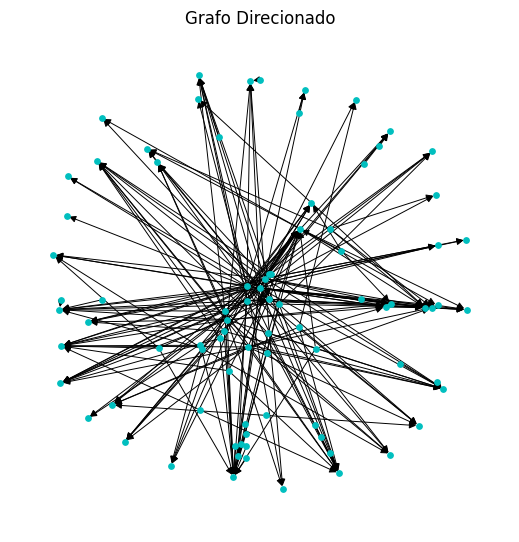

Não há ciclos no grafo.


In [48]:
def grapho_nx(gt_graph):
    """
    Converte um grafo do Graph-tool para NetworkX.

    Parâmetros:
    gt_graph (GraphTool Graph): Grafo do Graph-tool.

    Retorna:
    G_nx (networkx.DiGraph): Grafo convertido para NetworkX.
    """
    # Criando um grafo direcionado do NetworkX
    G_nx = nx.DiGraph()

    # Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
    for edge in gt_graph.edges():
        G_nx.add_edge(edge.source(), edge.target())

    # Convertendo rótulos de nós para inteiros
    mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
    G_nx = nx.relabel_nodes(G_nx, mapeamento)

    return G_nx

def plotar_grafo(G_nx):
    """
    Plota o grafo utilizando matplotlib.

    Parâmetros:
    G_nx (networkx.DiGraph): Grafo do NetworkX a ser plotado.
    """
    pos = nx.spring_layout(G_nx)  # Layout para o grafo
    plt.figure(figsize=(5, 5))

    # Plotando o grafo com os ajustes solicitados
    nx.draw(
        G_nx, pos,
        with_labels=False,  # Sem rótulos
        node_color='c',  # Nós na cor azul escuro
        edge_color='black',  # Arestas na cor preta
        node_size=15,
        width=0.7,
        font_size=5,
        font_weight='bold',
        arrows=True
    )

    plt.title("Grafo Direcionado")
    plt.show()

def encontrar_ciclos(G_nx):
    """
    Encontra e imprime ciclos no grafo direcionado usando NetworkX.

    Parâmetros:
    G_nx (networkx.DiGraph): Grafo do NetworkX para encontrar ciclos.

    Retorna:
    None
    """
    try:
        ciclo = nx.find_cycle(G_nx, orientation='original')
        print(f'Ciclo encontrado: {ciclo}')
    except nx.NetworkXNoCycle:
        print('Não há ciclos no grafo.')

# Carrega o grafo do Graph-tool
G_gt = gt.collection.ns["fresh_webs/AkatoreA"]

# Converte o grafo para NetworkX
G_nx = grapho_nx(G_gt)

# Plota o grafo
plotar_grafo(G_nx)

# Encontra e imprime ciclos no grafo
encontrar_ciclos(G_nx)


**Exercício 5.** Considere uma das definições da medida de
reciprocidade definida em en.wikipedia.org/wiki/Reciprocity_(network_science).
Nas redes com ciclos, calcule o valor da reciprocidade. Compare estes valores, mencionando possíveis razões para uma rede ser mais recíproca que a outra.

In [49]:
def reciprocity_garlaschelli_loffredo(G_gt):
    """
    Calcula a reciprocidade de Garlaschelli e Loffredo para um grafo direcionado.

    Parameters:
    G_gt (Graph): O grafo direcionado do graph-tool.

    Returns:
    float: A reciprocidade calculada.
    """
    # Criar um grafo vazio do NetworkX
    G_nx = nx.DiGraph()

    # Adicionar arestas do grafo do Graph-tool para o grafo do NetworkX
    for edge in G_gt.edges():
        G_nx.add_edge(edge.source(), edge.target())

    # Remover auto-laços
    G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

    # Número de arestas reciprocamente conectadas
    reciprocal_edges = 0
    total_edges = G_nx.number_of_edges()

    for u, v in G_nx.edges():
        if G_nx.has_edge(v, u):  # Checa se existe a aresta reversa
            reciprocal_edges += 1

    # A reciprocidade é dada pela fórmula:
    if total_edges == 0:
        return 0
    return reciprocal_edges / total_edges

def calculate_reciprocities(graphs):
    """
    Calcula e exibe a reciprocidade para uma lista de grafos.

    Parameters:
    graphs (list of Graph): Lista de grafos direcionados do graph-tool.
    """
    for name, G_gt in graphs:
        # Calcular a reciprocidade
        reciprocity = reciprocity_garlaschelli_loffredo(G_gt)
        # Exibir o resultado
        print(f"Reciprocidade da rede {name}: {reciprocity:.2f}")

# Lista de redes a serem analisadas (substitua com seus grafos reais)
graphs = [
    ("bitcoin_alpha", collection.ns["bitcoin_alpha"]),
    ("7th_graders", collection.ns["7th_graders"]),  # Exemplo de outra rede
    # Adicione mais grafos conforme necessário
]

# Calcular e exibir a reciprocidade para cada rede
calculate_reciprocities(graphs)


Reciprocidade da rede bitcoin_alpha: 0.83
Reciprocidade da rede 7th_graders: 0.67


# Comparação da Reciprocidade das Redes

A reciprocidade é uma medida que indica a fração de pares de nós em um grafo direcionado que estão conectados por arestas em ambas as direções. Os valores de reciprocidade para as redes analisadas são:

- **Rede `bitcoin_alpha`**: 0.83
- **Rede `7th_graders`**: 0.67

A reciprocidade é dada pela fórmula:

$$R = \frac{E_{\text{recíprocas}}}{E_{\text{total}}}$$

onde $E_{\text{recíprocas}}$ é o número de pares de arestas recíprocas e $E_{\text{total}}$ é o número total de arestas no grafo.

## Comparação e Possíveis Razões

1. **Significado dos Valores:**
   - A reciprocidade da rede `bitcoin_alpha` é 0.83, indicando que 83% das arestas formam pares recíprocos.
   - A reciprocidade da rede `7th_graders` é 0.67, indicando que 67% das arestas são reciprocamente conectadas.

2. **Razões para Diferenças na Reciprocidade:**
   - **Tipo de Rede:** A rede `bitcoin_alpha` pode representar interações mais frequentemente recíprocas, enquanto a `7th_graders` pode ter interações mais unilaterais.
   - **Estrutura da Rede:** Redes mais densas e interconectadas tendem a ter maior reciprocidade.
   - **Tamanho e Complexidade:** Redes maiores e mais complexas podem ter menor reciprocidade devido ao aumento das arestas unidirecionais.
   - **Natureza das Conexões:** A natureza das interações pode influenciar a reciprocidade, com algumas redes mostrando mais reciprocidade devido a conexões mutuamente benéficas.
   - **Contexto e Aplicação:** O contexto das redes pode afetar a reciprocidade, como em redes sociais onde interações recíprocas são comuns.


### Definindo features

Vamos criar uma função que calcule todas as features que desejamos utilizar como atributos em nossos modelos.

1. **k1 (Primeiro momento do grau):** É a média dos graus de todos os nós em uma rede. Em outras palavras, é a média do número de conexões que cada nó possui.

2. **k2 (Segundo momento do grau):** É a média dos quadrados dos graus de todos os nós em uma rede. Isso fornece informações sobre a dispersão dos graus na rede.

3. **variance (Variância):** É uma medida de quão dispersos estão os graus dos nós em uma rede. Quanto maior a variância, mais heterogênea é a distribuição dos graus.

4. **av_cl (Average Clustering):** É a média dos coeficientes de agrupamento de todos os nós na rede. O coeficiente de agrupamento de um nó indica a probabilidade de que os vizinhos desse nó também sejam conectados entre si.

5. **l (Average shortest path length):** É a média das distâncias mais curtas entre todos os pares de nós na rede. Isso fornece uma medida de quão facilmente a informação ou influência pode se espalhar pela rede.

6. **r (Grau do coeficiente de assortatividade):** É uma medida de quão bem os nós com graus semelhantes estão conectados entre si. Um valor positivo indica que nós com graus altos tendem a se conectar com outros nós com graus altos, e nós com graus baixos tendem a se conectar com outros nós com graus baixos.

7. **H (Entropia de Shannon):** É uma medida da incerteza na distribuição dos graus dos nós em uma rede. Uma rede com uma distribuição de graus uniforme terá uma entropia maior do que uma rede com uma distribuição mais desigual.

8. **av_B (Centralidade média):** É a média das centralidades de todos os nós na rede. A centralidade de um nó mede sua importância na rede com base em diferentes critérios, como proximidade, intermediação ou centralidade de grau.

9. **av_knn (Média do grau dos vizinhos mais próximos):** É a média dos graus dos vizinhos mais próximos de todos os nós na rede. Isso fornece informações sobre o ambiente local de cada nó na rede.

1. **Primeiro Momento do Grau** ($k_1$):
   $$k_1 = \frac{1}{N} \sum_{i=1}^{N} k_i$$

2. **Segundo Momento do Grau** ( $k_2$):
   $$k_2 = \frac{1}{N} \sum_{i=1}^{N} k_i^2$$

3. **Variância do Grau** ($\text{variance}$):
   $$\text{variance} = \frac{1}{N} \sum_{i=1}^{N} (k_i - k_1)^2$$

4. **Average Clustering** ($\text{av_cl})$:
   $$\text{av_cl} = \frac{1}{N} \sum_{i=1}^{N} C_i$$
   onde $C_i = \frac{2 E_i}{k_i (k_i - 1)}$ é o coeficiente de agrupamento para o vértice $i$.

**Medidas Globais**

5. **Average Shortest Path Length** ($l$):
   $$l = \frac{1}{N(N-1)} \sum_{i \neq j} d(i, j)$$
   onde $d(i, j)$ é a distância entre os vértices $i$ e $j$.

6. **Coeficiente de Assortatividade** ($r$):
   $$r = \frac{\sum_{jk} jk(e_{jk} - q_j q_k)}{\sigma_q^2}$$

7. **Entropia de Shannon** ($\mathcal{H}$):
 $$ \mathcal{H} = -\sum_k P(k) \log P(k)$$

8. **Centralidade Média**  ($\text{av_B}$):
   $$\text{av_B} = \frac{1}{N} \sum_{i=1}^{N} B_i$$

9. **Média do Grau dos Vizinhos mais Próximos** ($\text{av_knn}$):
   $$\text{av_knn} = \frac{1}{N} \sum_{i=1}^{N} k_{nn,i}$$
   onde $$k_{nn, i} = \frac{1}{k_i} \sum_{j \in V(i)} k_j$$ é a média do grau dos vizinhos de $i$.

In [ ]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # Pegamos apenas os valores dos graus
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues = np.arange(0, maxk + 1)  # Valores possíveis de k

    Pk = np.zeros(maxk + 1)  # P(k)
    for k in vk:
        Pk[k] += 1
    Pk = Pk / sum(Pk)  # A soma dos elementos de P(k) deve ser igual a um

    return kvalues, Pk

def measures(G):
    def momment_of_degree_distribution(G, m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M += G.degree(i) ** m
        M /= N
        return M

    def shannon_entropy(G):
        k, Pk = degree_distribution(G)
        H = 0
        for p in Pk:
            if p > 0:
                H -= p * math.log(p, 2)
        return H

    knn = []
    for i in G.nodes():
        aux = nx.average_neighbor_degree(G, nodes=[i])
        knn.append(float(aux[i]))
    knn = np.array(knn)
    av_knn = np.mean(knn)

    N = len(G)
    M = G.number_of_edges()
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G, 1)
    k2 = momment_of_degree_distribution(G, 2)
    variance = momment_of_degree_distribution(G, 2) - momment_of_degree_distribution(G, 1) ** 2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r = nx.degree_assortativity_coefficient(G)
    H = shannon_entropy(G)
    B = dict(nx.betweenness_centrality(G))
    B = list(B.values())
    av_B = np.mean(B)

    return k1, k2, variance, av_cl, l, r, H, av_B, av_knn

Uma vez criada a função com as features que desejamos utilizar, bastar chamarmos a função para que possamos calcular as features referente a rede selecionada.

### Distribuição do grau

In [ ]:
ks, Pk = degree_distribution(G_nx)

plt.figure(figsize=(7, 4))

# Primeiro gráfico (log-log)
plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.plot(ks, Pk, "ro")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=10)
plt.title("Distribuição do Grau (log-log)", fontsize=10)

# Segundo gráfico (linear)
plt.subplot(1, 2, 2)
plt.plot(ks, Pk, "ro")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribuição do Grau", fontsize=10)

plt.tight_layout()
plt.show()

### Aplicando a função de Futures

In [ ]:
k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(G_nx)
X_net = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
print(X_net)

### Criando as redes complexas

Vamos criar uma função que gere modelos de redes complexas atrelados as features que definimos acima. Além disso, vamos acoplar um classificador o qual nos dirá qual o modelo de rede o modelo de classificação identificou.

In [ ]:
def generate_network_data(N, av_degree, n_nets):
    cl = ["ER", "WS", "BA", "WS__", "WG"]
    X = []
    y = []
    p = av_degree/(N - 1)

    # ER networks
    for i in range(n_nets):
        GER = nx.gnp_random_graph(N, p, seed=(42 + i), directed=False)
        Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
        GER = GER.subgraph(Gcc[0])
        GER = nx.convert_node_labels_to_integers(GER, first_label=0)
        k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(GER)
        x = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
        X.append(x)
        y.append(0.0)

    # WS networks
    k = int(av_degree)
    p_ = 0.1  # probability of rewiring
    for i in range(n_nets):
        GWS = nx.watts_strogatz_graph(N, k, p_, seed=(42 + i))
        Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
        GWS = GWS.subgraph(Gcc[0])
        GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
        k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(GWS)
        x = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
        X.append(x)
        y.append(1.0)

    # BA networks
    m = int(av_degree/2)
    for i in range(n_nets):
        GBA = nx.barabasi_albert_graph(N, m)
        Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
        GBA = GBA.subgraph(Gcc[0])
        GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
        k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(GBA)
        x = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
        X.append(x)
        y.append(2.0)

    # WS__ networks
    k = int(av_degree)
    p__ = 0.3
    for i in range(n_nets):
        GWS__ = nx.watts_strogatz_graph(N, k, p__, seed=(42 + i))
        Gcc = sorted(nx.connected_components(GWS__), key=len, reverse=True)
        GWS__ = GWS__.subgraph(Gcc[0])
        GWS__ = nx.convert_node_labels_to_integers(GWS__, first_label=0)
        k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(GWS__)
        x = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
        X.append(x)
        y.append(3.0)

    # WG networks (Waxman)
    m = int(av_degree/2)
    for i in range(n_nets):
        GWX = nx.waxman_graph(N, seed=(42 + i))
        Gcc = sorted(nx.connected_components(GWX), key=len, reverse=True)
        GWX = GWX.subgraph(Gcc[0])
        GWX = nx.convert_node_labels_to_integers(GWX, first_label=0)
        k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(GWX)
        x = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
        X.append(x)
        y.append(4.0)

    X = np.array(X)
    y = np.array(y)

    return X, y, cl

### Aplicando a função de modelos de rede

In [ ]:
# Parâmetros
N = len(G_nx)   # Número de nós
n_nets = 100    # Número de redes
av_degree = k1  # Grau médio

X = None
y = None

# Geração dos dados
X, y, cl = generate_network_data(N, av_degree, n_nets)

### Função para calcular a acurácia da classificação da rede

In [ ]:
# Testando a acurácia dos modelos
def accuracy_models(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                        test_size = 0.3, shuffle = True,
                                                        random_state = 42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = np.nan_to_num(X_train)
    X_test = np.nan_to_num(X_test)

    # KNN
    k = 5
    model1 = KNeighborsClassifier(n_neighbors = k, metric = "euclidean")
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
    score1 = accuracy_score(y_pred1, y_test)

    # Regressao Logistica
    model2 = LogisticRegression(solver = "lbfgs", max_iter = 1000)
    model2.fit(X_train, y_train)
    y_pred2 = model2.predict(X_test)
    score2 = accuracy_score(y_pred2, y_test)

    # Naive Bayes
    model3 = GaussianNB()
    model3.fit(X_train, y_train)
    y_pred3 = model3.predict(X_test)
    score3 = accuracy_score(y_pred3, y_test)

    return score1, score2, score3

### Aplicando a função para calcular a acurácia das redes geradas

In [ ]:
score1, score2, score3 = accuracy_models(X, y)
print("Accuracy KNN:", score1)
print("Accuracy LR:", score2)
print("Accuracy NB:", score3)

### Função para a classificação da rede

In [ ]:
def predicao_modelos(X, y, X_rede):

    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    X_rede = np.array(X_rede)
    X_rede = X_rede.reshape(1, len(X_rede))
    X_rede = scaler.transform(X_rede)
    print("X_rede:", X_rede.shape)

    # KNN
    k = 5
    model1 = KNeighborsClassifier(n_neighbors = k, metric = "euclidean")
    model1.fit(X,y)
    y_pred1 = model1.predict(X_rede)
    pred1 = cl[int(y_pred1.item())]

    model2 = LogisticRegression(solver = "lbfgs", max_iter = 1000)
    model2.fit(X, y)
    y_pred2 = model2.predict(X_rede)
    pred2 = cl[int(y_pred2.item())]

    model3 = GaussianNB()
    model3.fit(X, y)
    y_pred3 = model3.predict(X_rede)
    pred3 = cl[int(y_pred3.item())]

    return pred1, pred2, pred3

### Aplicando a função de classificação de rede

In [ ]:
pred1, pred2, pred3 = predicao_modelos(X, y, X_net)
print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

Devido ao fato de que nenhum dos modelos classificou a rede selecionada como uma rede BA (Barabási-Albert), neste momento não realizaremos a avaliação das features que mais impactam essa classificação.

# Rede `yeast_transcription`

In [ ]:
# Importando a rede do Graph-tool

G_gt = gt.collection.ns["yeast_transcription"]

# Criando um grafo vazio do NetworkX
G_nx = nx.Graph()

# Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
for edge in G_gt.edges():
    G_nx.add_edge(edge.source(), edge.target())

# Removendo auto-laços
G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

# Obtendo o maior componente conectado
Gcc = sorted(nx.connected_components(G_nx), key=len, reverse=True)
G_nx = G_nx.subgraph(Gcc[0])

# Convertendo rótulos de nós para inteiros
mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
G_nx = nx.relabel_nodes(G_nx, mapeamento)

N = len(G_nx)
M = G_nx.number_of_edges()
print("Número de nós:", N)
print("Número de arestas:", M)

#Calculando a posição dos nós usando o layout spring do NetworkX
pos = nx.spring_layout(G_nx)

#Desenhando o grafo
plt.figure(figsize=(10, 10))
nx.draw(G_nx, pos, node_color="red", node_size=50, with_labels=False)
plt.show()

### Distribuição do grau

In [ ]:
ks, Pk = degree_distribution(G_nx)

plt.figure(figsize=(7, 4))

# Primeiro gráfico (log-log)
plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.plot(ks, Pk, "ro")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=10)
plt.title("Distribuição do Grau (log-log)", fontsize=10)

# Segundo gráfico (linear)
plt.subplot(1, 2, 2)
plt.plot(ks, Pk, "ro")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribuição do Grau", fontsize=10)

plt.tight_layout()
plt.show()

### Aplicando a função de features

In [ ]:
k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(G_nx)
X_net = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
print(X_net)

### Aplicando a função de modelos de redes

In [ ]:
# Parâmetros
N = len(G_nx)   # Número de nós
n_nets = 100    # Número de redes
av_degree = k1  # Grau médio
X = None
y = None
# Geração dos dados
X, y, cl = generate_network_data(N, av_degree, n_nets)

### Aplicando a função para calcular a acurácia das redes geradas

In [ ]:
score1, score2, score3 = accuracy_models(X, y)
print("Accuracy KNN:", score1)
print("Accuracy LR:", score2)
print("Accuracy NB:", score3)

### Aplicando a função de classificação de rede

In [ ]:
pred1, pred2, pred3 = predicao_modelos(X, y, X_net)
print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

Observe que dois modelos classificaram a rede como BA (Barabási-Albert) e um modelo a classificou como WG (Waxman). Vamos analisar quais features mais contribuíram para essas classificações. Para isso, definiremos uma função que gera um gráfico dessas contribuições.

### Função para encontrar a importância das features

In [ ]:
def predicao_modelos_importance(X, y, x_rede, cl):
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    x_rede = np.array(x_rede)
    x_rede = x_rede.reshape(1, len(x_rede))
    x_rede = scaler.transform(x_rede)

    feat = ["k1", "k2", "variance", "av_cl", "l", "r", "H", "av_B", "av_knn"]

    k = 5
    model1 = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    model1.fit(X, y)
    y_pred1 = model1.predict(x_rede)
    pred1 = cl[int(y_pred1.item())]

    model2 = LogisticRegression(solver="lbfgs", max_iter=1000)
    model2.fit(X, y)
    y_pred2 = model2.predict(x_rede)
    pred2 = cl[int(y_pred2.item())]

    model3 = GaussianNB()
    model3.fit(X, y)
    y_pred3 = model3.predict(x_rede)
    pred3 = cl[int(y_pred3.item())]

    # Importância das features para Regressão Logística
    coefficients = model2.coef_
    avg_importance = np.mean(np.abs(coefficients), axis=0)
    normalized_importance = avg_importance / np.sum(avg_importance)
    feature_importance_lr = pd.DataFrame({"Feature": feat, "Importance": normalized_importance})
    feature_importance_lr = feature_importance_lr.sort_values("Importance", ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Importance'], color='red')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title("Feature Importance - Logistic Regression")
    plt.show()

    # Importância das features para KNN
    result_knn = permutation_importance(model1, X, y, n_repeats=30, random_state=42)
    feature_importance_knn = pd.DataFrame({"Feature": feat, "Importance": result_knn.importances_mean})
    feature_importance_knn = feature_importance_knn.sort_values("Importance", ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_knn['Feature'], feature_importance_knn['Importance'], color='red')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title("Feature Importance - KNN")
    plt.show()

    # Importância das features para GaussianNB
    result_nb = permutation_importance(model3, X, y, n_repeats=30, random_state=42)
    feature_importance_nb = pd.DataFrame({"Feature": feat, "Importance": result_nb.importances_mean})
    feature_importance_nb = feature_importance_nb.sort_values("Importance", ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_nb['Feature'], feature_importance_nb['Importance'], color='red')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title("Feature Importance - Naive Bayes")
    plt.show()

    return pred1, pred2, pred3

In [ ]:
cl = ["ER", "WS", "BA", "WS__", "WG"]

# Suponha que X, y, e X_net sejam definidos anteriormente no código
pred1, pred2, pred3 = predicao_modelos_importance(X, y, X_net, cl )

print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)


O diagnóstico sobre as principais features que contribuem para a classificação da rede como BA será apresentado no final do notebook.

# Rede `foodweb_little_rock`

In [ ]:

# Importando a rede do Graph-tool

G_gt = gt.collection.ns["foodweb_little_rock"]

# Criando um grafo vazio do NetworkX
G_nx = nx.Graph()

# Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
for edge in G_gt.edges():
    G_nx.add_edge(edge.source(), edge.target())

# Removendo auto-laços
G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

# Obtendo o maior componente conectado
Gcc = sorted(nx.connected_components(G_nx), key=len, reverse=True)
G_nx = G_nx.subgraph(Gcc[0])

# Convertendo rótulos de nós para inteiros
mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
G_nx = nx.relabel_nodes(G_nx, mapeamento)

N = len(G_nx)
M = G_nx.number_of_edges()
print("Número de nós:", N)
print("Número de arestas:", M)

#Calculando a posição dos nós usando o layout spring do NetworkX
pos = nx.spring_layout(G_nx)

#Desenhando o grafo
plt.figure(figsize=(10, 10))
nx.draw(G_nx, pos, node_color="red", node_size=50, with_labels=False)
plt.show()

### Distribuição do grau


In [ ]:
ks, Pk = degree_distribution(G_nx)

plt.figure(figsize=(7, 4))

# Primeiro gráfico (log-log)
plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.plot(ks, Pk, "ro")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=10)
plt.title("Distribuição do Grau (log-log)", fontsize=10)

# Segundo gráfico (linear)
plt.subplot(1, 2, 2)
plt.plot(ks, Pk, "ro")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribuição do Grau", fontsize=10)

plt.tight_layout()
plt.show()

### Aplicando a função de features

In [ ]:
k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(G_nx)
X_net = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
print(X_net)

### Aplicando a função de modelos de redes

In [ ]:
# Parâmetros
N = len(G_nx)   # Número de nós
n_nets = 100    # Número de redes
av_degree = k1  # Grau médio
X = None
y = None
# Geração dos dados
X, y, cl = generate_network_data(N, av_degree, n_nets)

### Aplicando a função para calcular a acurácia das redes geradas

In [ ]:
score1, score2, score3 = accuracy_models(X, y)
print("Accuracy KNN:", score1)
print("Accuracy LR:", score2)
print("Accuracy NB:", score3)

### Aplicando a função de classificação de rede

In [ ]:
pred1, pred2, pred3 = predicao_modelos(X, y, X_net)
print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

Aqui, novamente temos dois modelos classificando a rede como BA (Barabási-Albert), então vamos avaliar as features que mais influenciaram nesta classificação.

In [ ]:
pred1, pred2, pred3 = predicao_modelos_importance(X, y, X_net, cl )

print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)


------

# Redes Tecnológicas

Agora vamos fazer a classificação para as redes sociais a seguir:

Site utilizado: https://networks.skewed.de

https://networks.skewed.de/net/cs_department (Aarhus Computer Science department relationships)

https://networks.skewed.de/net/facebook_friends (Maier Facebook friends (2014))

https://networks.skewed.de/net/macaques (Japanese macaques (1976))

# Rede `Aarhus Computer Science department relationships `

In [ ]:
# Importando a rede do Graph-tool

G_gt = gt.collection.ns["cs_department"]


# Criando um grafo vazio do NetworkX
G_nx = nx.Graph()

# Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
for edge in G_gt.edges():
    G_nx.add_edge(edge.source(), edge.target())

# Removendo auto-laços
G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

# Obtendo o maior componente conectado
Gcc = sorted(nx.connected_components(G_nx), key=len, reverse=True)
G_nx = G_nx.subgraph(Gcc[0])

# Convertendo rótulos de nós para inteiros
mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
G_nx = nx.relabel_nodes(G_nx, mapeamento)

N = len(G_nx)
M = G_nx.number_of_edges()
print("Número de nós:", N)
print("Número de arestas:", M)

#Calculando a posição dos nós usando o layout spring do NetworkX
pos = nx.spring_layout(G_nx)

#Desenhando o grafo
plt.figure(figsize=(10, 10))
nx.draw(G_nx, pos, node_color="blue", node_size=50, with_labels=False)
plt.show()

### Distribuição do grau

In [ ]:
ks, Pk = degree_distribution(G_nx)

plt.figure(figsize=(7, 4))

# Primeiro gráfico (log-log)
plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.plot(ks, Pk, "bo")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=10)
plt.title("Distribuição do Grau (log-log)", fontsize=10)

# Segundo gráfico (linear)
plt.subplot(1, 2, 2)
plt.plot(ks, Pk, "bo")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribuição do Grau", fontsize=10)

plt.tight_layout()
plt.show()

### Aplicando a função de features

In [ ]:
k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(G_nx)
X_net = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
print(X_net)

### Aplicando a função de modelos de redes

In [ ]:
# Parâmetros
N = len(G_nx)  # Número de nós
n_nets = 100    # Número de redes
av_degree = k1 # Grau médio
X = None
y = None
# Geração dos dados
X, y, cl = generate_network_data(N, av_degree, n_nets)


### Aplicando a função para calcular a acurácia das redes geradas

In [ ]:
score1, score2, score3 = accuracy_models(X, y)
print("Accuracy KNN:", score1)
print("Accuracy LR:", score2)
print("Accuracy NB:", score3)

### Aplicando a função de classificação de rede

In [ ]:
pred1, pred2, pred3 = predicao_modelos(X, y, X_net)
print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

Vamos refazer a função das importâncias das features para alterarmos as cores de plotagem gráficas. Dois modelos também classificaram a rede como BA.

### Função para encontrar a importância das features

In [ ]:
def predicao_modelos_importance(X, y, x_rede, cl):
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    x_rede = np.array(x_rede)
    x_rede = x_rede.reshape(1, len(x_rede))
    x_rede = scaler.transform(x_rede)

    feat = ["k1", "k2", "variance", "av_cl", "l", "r", "H", "av_B", "av_knn"]

    k = 5
    model1 = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    model1.fit(X, y)
    y_pred1 = model1.predict(x_rede)
    pred1 = cl[int(y_pred1.item())]

    model2 = LogisticRegression(solver="lbfgs", max_iter=1000)
    model2.fit(X, y)
    y_pred2 = model2.predict(x_rede)
    pred2 = cl[int(y_pred2.item())]

    model3 = GaussianNB()
    model3.fit(X, y)
    y_pred3 = model3.predict(x_rede)
    pred3 = cl[int(y_pred3.item())]

    # Importância das features para Regressão Logística
    coefficients = model2.coef_
    avg_importance = np.mean(np.abs(coefficients), axis=0)
    normalized_importance = avg_importance / np.sum(avg_importance)
    feature_importance_lr = pd.DataFrame({"Feature": feat, "Importance": normalized_importance})
    feature_importance_lr = feature_importance_lr.sort_values("Importance", ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Importance'], color='blue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title("Feature Importance - Logistic Regression")
    plt.show()

    # Importância das features para KNN
    result_knn = permutation_importance(model1, X, y, n_repeats=30, random_state=42)
    feature_importance_knn = pd.DataFrame({"Feature": feat, "Importance": result_knn.importances_mean})
    feature_importance_knn = feature_importance_knn.sort_values("Importance", ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_knn['Feature'], feature_importance_knn['Importance'], color='blue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title("Feature Importance - KNN")
    plt.show()

    # Importância das features para GaussianNB
    result_nb = permutation_importance(model3, X, y, n_repeats=30, random_state=42)
    feature_importance_nb = pd.DataFrame({"Feature": feat, "Importance": result_nb.importances_mean})
    feature_importance_nb = feature_importance_nb.sort_values("Importance", ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_nb['Feature'], feature_importance_nb['Importance'], color='blue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title("Feature Importance - Naive Bayes")
    plt.show()

    return pred1, pred2, pred3

In [ ]:
pred1, pred2, pred3 = predicao_modelos_importance(X, y, X_net, cl )

print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

# Rede `Maier Facebook friends (2014)`

In [ ]:
# Importando a rede do Graph-tool

G_gt = gt.collection.ns["facebook_friends"]


# Criando um grafo vazio do NetworkX
G_nx = nx.Graph()

# Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
for edge in G_gt.edges():
    G_nx.add_edge(edge.source(), edge.target())

# Removendo auto-laços
G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

# Obtendo o maior componente conectado
Gcc = sorted(nx.connected_components(G_nx), key=len, reverse=True)
G_nx = G_nx.subgraph(Gcc[0])

# Convertendo rótulos de nós para inteiros
mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
G_nx = nx.relabel_nodes(G_nx, mapeamento)

N = len(G_nx)
M = G_nx.number_of_edges()
print("Número de nós:", N)
print("Número de arestas:", M)

#Calculando a posição dos nós usando o layout spring do NetworkX
pos = nx.spring_layout(G_nx)

#Desenhando o grafo
plt.figure(figsize=(10, 10))
nx.draw(G_nx, pos, node_color="blue", node_size=50, with_labels=False)
plt.show()

### Distribuição do grau

In [ ]:
ks, Pk = degree_distribution(G_nx)

plt.figure(figsize=(7, 4))

# Primeiro gráfico (log-log)
plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.plot(ks, Pk, "bo")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=10)
plt.title("Distribuição do Grau (log-log)", fontsize=10)

# Segundo gráfico (linear)
plt.subplot(1, 2, 2)
plt.plot(ks, Pk, "bo")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribuição do Grau", fontsize=10)

plt.tight_layout()
plt.show()

### Aplicando a função de features

In [ ]:
k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(G_nx)
X_net = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
print(X_net)

### Aplicando a função de modelos de redes

In [ ]:
# Parâmetros
N = len(G_nx)  # Número de nós
n_nets = 100    # Número de redes
av_degree = k1 # Grau médio
X = None
y = None
# Geração dos dados
X, y, cl = generate_network_data(N, av_degree, n_nets)

### Aplicando a função para calcular a acurácia das redes geradas

In [ ]:
score1, score2, score3 = accuracy_models(X, y)
print("Accuracy KNN:", score1)
print("Accuracy LR:", score2)
print("Accuracy NB:", score3)

### Aplicando a função de classificação de rede

In [ ]:
pred1, pred2, pred3 = predicao_modelos(X, y, X_net)
print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

### Plotagem da importância das features

In [ ]:
pred1, pred2, pred3 = predicao_modelos_importance(X, y, X_net, cl )

print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

# Rede `Japanese macaques (1976)`

In [ ]:
# Importando a rede do Graph-tool

G_gt = gt.collection.ns["macaques"]


# Criando um grafo vazio do NetworkX
G_nx = nx.Graph()

# Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
for edge in G_gt.edges():
    G_nx.add_edge(edge.source(), edge.target())

# Removendo auto-laços
G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

# Obtendo o maior componente conectado
Gcc = sorted(nx.connected_components(G_nx), key=len, reverse=True)
G_nx = G_nx.subgraph(Gcc[0])

# Convertendo rótulos de nós para inteiros
mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
G_nx = nx.relabel_nodes(G_nx, mapeamento)

N = len(G_nx)
M = G_nx.number_of_edges()
print("Número de nós:", N)
print("Número de arestas:", M)

#Calculando a posição dos nós usando o layout spring do NetworkX
pos = nx.spring_layout(G_nx)

#Desenhando o grafo
plt.figure(figsize=(10, 10))
nx.draw(G_nx, pos, node_color="blue", node_size=50, with_labels=False)
plt.show()

### Distribuição do grau

In [ ]:
ks, Pk = degree_distribution(G_nx)

plt.figure(figsize=(7, 4))

# Primeiro gráfico (log-log)
plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.plot(ks, Pk, "bo")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=10)
plt.title("Distribuição do Grau (log-log)", fontsize=10)

# Segundo gráfico (linear)
plt.subplot(1, 2, 2)
plt.plot(ks, Pk, "bo")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribuição do Grau", fontsize=10)

plt.tight_layout()
plt.show()

###  Aplicando a função de features

In [ ]:
k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(G_nx)
X_net = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
print(X_net)

### Aplicando a função modelo de redes

In [ ]:
# Parâmetros
N = len(G_nx)  # Número de nós
n_nets = 100   # Número de redes
av_degree = k1 # Grau médio
X = None
y = None
# Geração dos dados
X, y, cl = generate_network_data(N, av_degree, n_nets)

### Aplicando a função para calcular a acurácia das redes geradas

In [ ]:
score1, score2, score3 = accuracy_models(X, y)
print("Accuracy KNN:", score1)
print("Accuracy LR:", score2)
print("Accuracy NB:", score3)

### Aplicando a função de classificação de rede

In [ ]:
pred1, pred2, pred3 = predicao_modelos(X, y, X_net)
print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

-----
# Redes Tecnológicas

Agora vamos fazer a classificação para as redes tecnológicas a seguir:

Site utilizado: https://networks.skewed.de

https://networks.skewed.de/net/internet_top_pop (Internet topology (PoP level) (1969-2012))

https://networks.skewed.de/net/software_dependencies (Software dependencies (2010))

https://networks.skewed.de/net/route_views (Route Views AS graphs (1997-1998))

# Rede `Internet topology`

In [ ]:
# Importando a rede do Graph-tool

G_gt = gt.collection.ns["internet_top_pop/Oteglobe"]


# Criando um grafo vazio do NetworkX
G_nx = nx.Graph()

# Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
for edge in G_gt.edges():
    G_nx.add_edge(edge.source(), edge.target())

# Removendo auto-laços
G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

# Obtendo o maior componente conectado
Gcc = sorted(nx.connected_components(G_nx), key=len, reverse=True)
G_nx = G_nx.subgraph(Gcc[0])

# Convertendo rótulos de nós para inteiros
mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
G_nx = nx.relabel_nodes(G_nx, mapeamento)

N = len(G_nx)
M = G_nx.number_of_edges()
print("Número de nós:", N)
print("Número de arestas:", M)

#Calculando a posição dos nós usando o layout spring do NetworkX
pos = nx.spring_layout(G_nx)

#Desenhando o grafo
plt.figure(figsize=(10, 10))
nx.draw(G_nx, pos, node_color="green", node_size=50, with_labels=False)
plt.show()

### Distribuição do grau

In [ ]:
ks, Pk = degree_distribution(G_nx)

plt.figure(figsize=(7, 4))

# Primeiro gráfico (log-log)
plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.plot(ks, Pk, "go")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=10)
plt.title("Distribuição do Grau (log-log)", fontsize=10)

# Segundo gráfico (linear)
plt.subplot(1, 2, 2)
plt.plot(ks, Pk, "go")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribuição do Grau", fontsize=10)

plt.tight_layout()
plt.show()

### Aplicando a função de features

In [ ]:
k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(G_nx)
X_net = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
print(X_net)

### Aplicando a função de modelos de redes

In [ ]:
# Parâmetros
N = len(G_nx)  # Número de nós
n_nets = 100   # Número de redes
av_degree = k1 # Grau médio
X = None
y = None
# Geração dos dados
X, y, cl = generate_network_data(N, av_degree, n_nets)

### Aplicando a função para calcular a acurácia das redes geradas

In [ ]:
score1, score2, score3 = accuracy_models(X, y)
print("Accuracy KNN:", score1)
print("Accuracy LR:", score2)
print("Accuracy NB:", score3)

### Aplicando a função de classificação de rede

In [ ]:
pred1, pred2, pred3 = predicao_modelos(X, y, X_net)
print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

# Rede `software_dependencies`

In [ ]:
# Importando a rede do Graph-tool

G_gt = gt.collection.ns["software_dependencies/flamingo"]


# Criando um grafo vazio do NetworkX
G_nx = nx.Graph()

# Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
for edge in G_gt.edges():
    G_nx.add_edge(edge.source(), edge.target())

# Removendo auto-laços
G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

# Obtendo o maior componente conectado
Gcc = sorted(nx.connected_components(G_nx), key=len, reverse=True)
G_nx = G_nx.subgraph(Gcc[0])

# Convertendo rótulos de nós para inteiros
mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
G_nx = nx.relabel_nodes(G_nx, mapeamento)

N = len(G_nx)
M = G_nx.number_of_edges()
print("Número de nós:", N)
print("Número de arestas:", M)

#Calculando a posição dos nós usando o layout spring do NetworkX
pos = nx.spring_layout(G_nx)

#Desenhando o grafo
plt.figure(figsize=(10, 10))
nx.draw(G_nx, pos, node_color="green", node_size=50, with_labels=False)
plt.show()

### Distribuição do grau

In [ ]:
ks, Pk = degree_distribution(G_nx)

plt.figure(figsize=(7, 4))

# Primeiro gráfico (log-log)
plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.plot(ks, Pk, "go")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=10)
plt.title("Distribuição do Grau (log-log)", fontsize=10)

# Segundo gráfico (linear)
plt.subplot(1, 2, 2)
plt.plot(ks, Pk, "go")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribuição do Grau", fontsize=10)

plt.tight_layout()
plt.show()

### Aplicando a função de features

In [ ]:
k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(G_nx)
X_net = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
print(X_net)

### Aplicando a função de modelos de redes

In [ ]:
# Parâmetros
N = len(G_nx)  # Número de nós
n_nets = 100   # Número de redes
av_degree = k1 # Grau médio
X = None
y = None
# Geração dos dados
X, y, cl = generate_network_data(N, av_degree, n_nets)

### Aplicando a função para calcular a acurácia das redes geradas

In [ ]:
score1, score2, score3 = accuracy_models(X, y)
print("Accuracy KNN:", score1)
print("Accuracy LR:", score2)
print("Accuracy NB:", score3)

### Aplicando a função de classificação de rede

In [ ]:
pred1, pred2, pred3 = predicao_modelos(X, y, X_net)
print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

Para a rede tecnológica `software_dependencies`, os modelos a classificaram como BA (Barabási-Albert). Vamos, portanto, analisar as variáveis que mais contribuem para essa classificação.

Vale destacar que iremos redefinir a função que plota as importâncias das features, garantindo que as cores utilizadas estejam alinhadas com as cores que estamos considerando para as redes tecnológicas.

### Função para encontrar a importância das features

In [ ]:
def predicao_modelos_importance(X, y, x_rede, cl):
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    x_rede = np.array(x_rede)
    x_rede = x_rede.reshape(1, len(x_rede))
    x_rede = scaler.transform(x_rede)

    feat = ["k1", "k2", "variance", "av_cl", "l", "r", "H", "av_B", "av_knn"]

    k = 5
    model1 = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    model1.fit(X, y)
    y_pred1 = model1.predict(x_rede)
    pred1 = cl[int(y_pred1.item())]

    model2 = LogisticRegression(solver="lbfgs", max_iter=1000)
    model2.fit(X, y)
    y_pred2 = model2.predict(x_rede)
    pred2 = cl[int(y_pred2.item())]

    model3 = GaussianNB()
    model3.fit(X, y)
    y_pred3 = model3.predict(x_rede)
    pred3 = cl[int(y_pred3.item())]

    # Importância das features para Regressão Logística
    coefficients = model2.coef_
    avg_importance = np.mean(np.abs(coefficients), axis=0)
    normalized_importance = avg_importance / np.sum(avg_importance)
    feature_importance_lr = pd.DataFrame({"Feature": feat, "Importance": normalized_importance})
    feature_importance_lr = feature_importance_lr.sort_values("Importance", ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Importance'], color='green')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title("Feature Importance - Logistic Regression")
    plt.show()

    # Importância das features para KNN
    result_knn = permutation_importance(model1, X, y, n_repeats=30, random_state=42)
    feature_importance_knn = pd.DataFrame({"Feature": feat, "Importance": result_knn.importances_mean})
    feature_importance_knn = feature_importance_knn.sort_values("Importance", ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_knn['Feature'], feature_importance_knn['Importance'], color='green')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title("Feature Importance - KNN")
    plt.show()

    # Importância das features para GaussianNB
    result_nb = permutation_importance(model3, X, y, n_repeats=30, random_state=42)
    feature_importance_nb = pd.DataFrame({"Feature": feat, "Importance": result_nb.importances_mean})
    feature_importance_nb = feature_importance_nb.sort_values("Importance", ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_nb['Feature'], feature_importance_nb['Importance'], color='green')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title("Feature Importance - Naive Bayes")
    plt.show()

    return pred1, pred2, pred3

In [ ]:
pred1, pred2, pred3 = predicao_modelos_importance(X, y, X_net, cl )

print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

# Rede `Route Views AS graphs`

In [ ]:
# Importando a rede do Graph-tool

G_gt = gt.collection.ns["route_views/19990110"]


# Criando um grafo vazio do NetworkX
G_nx = nx.Graph()

# Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
for edge in G_gt.edges():
    G_nx.add_edge(edge.source(), edge.target())

# Removendo auto-laços
G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

# Obtendo o maior componente conectado
Gcc = sorted(nx.connected_components(G_nx), key=len, reverse=True)
G_nx = G_nx.subgraph(Gcc[0])

# Convertendo rótulos de nós para inteiros
mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
G_nx = nx.relabel_nodes(G_nx, mapeamento)

N = len(G_nx)
M = G_nx.number_of_edges()
print("Número de nós:", N)
print("Número de arestas:", M)

#Calculando a posição dos nós usando o layout spring do NetworkX
pos = nx.spring_layout(G_nx)

#Desenhando o grafo
plt.figure(figsize=(10, 10))
nx.draw(G_nx, pos, node_color="green", node_size=50, with_labels=False)
plt.show()

### Distribuição do grau

In [ ]:
ks, Pk = degree_distribution(G_nx)

plt.figure(figsize=(7, 4))

# Primeiro gráfico (log-log)
plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.plot(ks, Pk, "go")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=10)
plt.title("Distribuição do Grau (log-log)", fontsize=10)

# Segundo gráfico (linear)
plt.subplot(1, 2, 2)
plt.plot(ks, Pk, "go")
plt.xlabel("k", fontsize=10)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribuição do Grau", fontsize=10)

plt.tight_layout()
plt.show()

### Aplicando a função de features

In [ ]:
k1, k2, variance, av_cl, l, r, H, av_B, av_knn = measures(G_nx)
X_net = [k1, k2, variance, av_cl, l, r, H, av_B, av_knn]
print(X_net)

### Aplicando a função de modelos de redes

In [ ]:
# Parâmetros
N = len(G_nx)  # Número de nós
n_nets = 100   # Número de redes
av_degree = k1 # Grau médio
X = None
y = None
# Geração dos dados
X, y, cl = generate_network_data(N, av_degree, n_nets)

### Aplicando a função para calcular a acurácia das redes geradas

In [ ]:
score1, score2, score3 = accuracy_models(X, y)
print("Accuracy KNN:", score1)
print("Accuracy LR:", score2)
print("Accuracy NB:", score3)

### Aplicando a função de classificação de rede

In [ ]:
pred1, pred2, pred3 = predicao_modelos(X, y, X_net)
print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

In [ ]:
pred1, pred2, pred3 = predicao_modelos_importance(X, y, X_net, cl )

print("Pred KNN:", pred1)
print("Pred LR:", pred2)
print("Pred NB:", pred3)

# Hipótese:
----
Redes do mesmo tipo seguem o mesmo modelo. Verifique se essa hipótese é verdadeira.

----

Consideramos o modelo final de uma rede como sendo o modelo com maior frequência entre as classificações dos modelos KNN, Regressão Logística e Naive Bayes.


A hipótese, de forma geral, é falsa. Selecionamos três redes em cada uma das categorias: "Redes Biológicas", "Redes Sociais" e "Redes Tecnológicas". Em todas as categorias, pelo menos uma rede foi classificada por um modelo diferente dos demais. Além disso, vale ressaltar que todos os modelos de classificação foram treinados sob as mesmas condições de otimização de hiperparâmetros.

**MODELOS DE CLASSIFICAÇÃO UTILIZADOS**

- **KNN** - K-Nearest Neighbors
- **LR**  - Linear Regression
- **NB**  - Naive Bayes

| **Categoria**        | **Redes**                                     | **KNN** | **LR** | **NB** | **Modelo Final** |
|----------------------|-----------------------------------------------|---------|--------|--------|------------------|
| **Redes Biológicas** | celegans_2019/hermaphrodite_gap_junction      | WS      | WS     | ER     | WS               |
|                      | yeast_transcription                           | BA      | BA     | WG     | BA               |
|                      | foodweb_little_rock                           | BA      | BA     | ER     | BA               |
| **Redes Sociais**    | Aarhus Computer Science                       | BA      | BA     | ER     | BA               |
|                      | Maier Facebook friends                        | BA      | BA     | WG     | BA               |
|                      | Japanese macaques                             | ER      | ER     | ER     | ER               |
| **Redes Tecnológicas** | Internet topology                           | ER      | ER     | WG     | ER               |
|                      | Software dependencies                         | BA      | BA     | WG     | BA               |
|                      | Route Views AS graphs                         | BA      | BA     | WG     | BA               |



---

**Bônus (não é obrigatório):** Identifique as principais diferenças entre os modelos. Isto é, quais medidas mais contribuem para que uma rede seja classificada como sendo do
modelo BA

---

Vamos considerar apenas as redes classificadas como BA (Barabási-Albert), para analisar quais features mais impactaram essa classificação.

- Redes Biológicas:
1. `yeast_transcription`;
2. `foodweb_little_rock`.

- Redes Sociais:
1. `Aarhus Computer Science`;
2. `Maier Facebook friends`.

- Redes Tecnológicas:
1. `Software dependencies`;
2. `Route Views AS graphs`.


---

### Redes Biológicas

Vamos avaliar as cinco principais features que mais impactaram na classificação da rede `yeast_transcription` como sendo uma rede de BA.

| **Modelo** | **Feature 1**  | **Feature 2**  | **Feature 3**  | **Feature 4**  | **Feature 5**  | **Classificação** |
|------------|----------------|----------------|----------------|----------------|----------------|-------------------|
| **KNN**    | av_B     | I     | H     | r     |   av_knn   | BA                |
| **LR**     | H     | r     | av_B     | I     | av_knn     | BA                |
| **NB**     | k1     | k2     | variance     | av_knn     | av_cl     | WG               |

Analogamente, para a rede `foodweb_little_rock`

| **Modelo** | **Feature 1**  | **Feature 2**  | **Feature 3**  | **Feature 4**  | **Feature 5**  | **Classificação** |
|------------|----------------|----------------|----------------|----------------|----------------|-------------------|
| **KNN**    | av_cl     | variance     | H     | -     | -     | BA                |
| **LR**     | H     | av_cl     | variance     | I     | av_B     | BA                |
| **NB**     | av_cl     | variance     | H     | r     | av_knn     | ER              |


---

### Redes Sociais

Vamos avaliar as cinco principais features que mais impactaram na classificação da rede `Aarhus Computer Science` como sendo uma rede de BA.

| **Modelo** | **Feature 1**  | **Feature 2**  | **Feature 3**  | **Feature 4**  | **Feature 5**  | **Classificação** |
|------------|----------------|----------------|----------------|----------------|----------------|-------------------|
| **KNN**    | variance     | av_cl     | H     | k2     |   k1   | BA                |
| **LR**     | av_cl     | H     | variance     | k2     | k1     | BA                |
| **NB**     | k1     | k2     | av_knn     | av_B     | variance     | ER               |


Analogamente, para a rede `Maier Facebook friends`

| **Modelo** | **Feature 1**  | **Feature 2**  | **Feature 3**  | **Feature 4**  | **Feature 5**  | **Classificação** |
|------------|----------------|----------------|----------------|----------------|----------------|-------------------|
| **KNN**    | r     | k1     | av_B     | H     | I     | BA                |
| **LR**     | r    | k2     | av_B     | I     | H     | BA                |
| **NB**     | k1     | av_cl     | variance     | av_knn     | k2     | WG              |

---

### Redes Tecnológicas

Vamos avaliar as cinco principais features que mais impactaram na classificação da rede `Software dependencies` como sendo uma rede de BA.


| **Modelo** | **Feature 1**  | **Feature 2**  | **Feature 3**  | **Feature 4**  | **Feature 5**  | **Classificação** |
|------------|----------------|----------------|----------------|----------------|----------------|-------------------|
| **KNN**    | av_cl     | variance     | H     | av_B     |   I   | BA                |
| **LR**     | av_cl     | H     | av_B     | I     | av_knn     | BA                |
| **NB**     | k1     | k2     | av_knn     | variance     | av_cl     | WG              |

Analogamente, para a rede `Route Views AS graphs`

| **Modelo** | **Feature 1**  | **Feature 2**  | **Feature 3**  | **Feature 4**  | **Feature 5**  | **Classificação** |
|------------|----------------|----------------|----------------|----------------|----------------|-------------------|
| **KNN**    | av_cl     | variance     | av_B     | I     | av_knn    | BA                |
| **LR**     | av_cl    | H     | variance     | av_B     | I     | BA                |
| **NB**     | k1     | k2     | av_knn     | variance     | av_B     | WG              |

---

### **Diagnóstico geral sobre a classificação das redes como BA**

A classificação de redes complexas em modelos de redes de Barabási-Albert (BA) depende de várias características estruturais e métricas da rede. Analisando as diferentes redes biológicas, sociais e tecnológicas, é possível observar quais características são mais influentes na classificação dessas redes como BA por diferentes modelos de machine learning.

## **Redes Biológicas**

**Rede: yeast_transcription**
- **KNN:** As principais características que influenciam são a centralidade média (**av_B**), número médio de nós intermediários (**I**), entropia de Shannon (**H**), coeficiente de assortatividade (**r**) e a média do grau dos vizinhos mais próximos (**av_knn**).
- **LR:** A entropia de Shannon (**H**), coeficiente de assortatividade (**r**), centralidade média (**av_B**), número médio de nós intermediários (**I**), e a média do grau dos vizinhos mais próximos (**av_knn**) são os mais influentes.
- **NB:** Curiosamente, o modelo NB (Naive Bayes) não classificou esta rede como BA, destacando **k1**, **k2**, **variance**, **av_knn** e **av_cl** como características principais.

**Rede: foodweb_little_rock**
- **KNN:** A média de agrupamento (**av_cl**), variância (**variance**) e entropia de Shannon (**H**) são as características principais.
- **LR:** Entropia de Shannon (**H**), média de agrupamento (**av_cl**), variância (**variance**), número médio de nós intermediários (**I**) e centralidade média (**av_B**) são os mais influentes.
- **NB:** O modelo NB classificou esta rede como ER, com **av_cl**, **variance**, **H**, **r** e **av_knn** como características principais.

## **Redes Sociais**

**Rede: Aarhus Computer Science**
- **KNN:** A variância (**variance**), média de agrupamento (**av_cl**), entropia de Shannon (**H**), segundo momento do grau (**k2**) e o primeiro momento do grau (**k1**) são as características principais.
- **LR:** Média de agrupamento (**av_cl**), entropia de Shannon (**H**), variância (**variance**), segundo momento do grau (**k2**) e o primeiro momento do grau (**k1**) são os mais influentes.
- **NB:** O modelo NB classificou esta rede como ER, com **k1**, **k2**, **av_knn**, **av_B** e **variance** como características principais.

**Rede: Maier Facebook friends**
- **KNN:** Coeficiente de assortatividade (**r**), primeiro momento do grau (**k1**), centralidade média (**av_B**), entropia de Shannon (**H**) e número médio de nós intermediários (**I**) são as características principais.
- **LR:** Coeficiente de assortatividade (**r**), segundo momento do grau (**k2**), centralidade média (**av_B**), número médio de nós intermediários (**I**) e entropia de Shannon (**H**) são os mais influentes.
- **NB:** O modelo NB classificou esta rede como WG, com **k1**, **av_cl**, **variance**, **av_knn** e **k2** como características principais.

## **Redes Tecnológicas**

**Rede: Software dependencies**
- **KNN:** As principais características que influenciam são a média de agrupamento (**av_cl**), variância (**variance**), entropia de Shannon (**H**), centralidade média (**av_B**), e o número médio de nós intermediários (**I**).
- **LR:** A média de agrupamento (**av_cl**), entropia de Shannon (**H**), centralidade média (**av_B**), número médio de nós intermediários (**I**), e a média do grau dos vizinhos mais próximos (**av_knn**) são os mais influentes.
- **NB:** Curiosamente, o modelo NB (Naive Bayes) não classificou esta rede como BA, destacando **k1**, **k2**, **av_knn**, **variance** e **av_cl** como características principais.

**Rede: Route Views AS graphs**
- **KNN:** Média de agrupamento (**av_cl**), variância (**variance**), centralidade média (**av_B**), número médio de nós intermediários (**I**) e média do grau dos vizinhos mais próximos (**av_knn**) são as características principais.
- **LR:** Média de agrupamento (**av_cl**), entropia de Shannon (**H**), variância (**variance**), centralidade média (**av_B**) e número médio de nós intermediários (**I**) são os mais influentes.
- **NB:** O modelo NB classificou esta rede como WG, com **k1**, **k2**, **av_knn**, **variance** e **av_B** como características principais.

# **Observações Gerais**

1. **Consistência entre Modelos:** Em geral, KNN e LR mostram mais consistência em identificar redes como BA, especialmente com a média de agrupamento (**av_cl**), entropia de Shannon (**H**), e variância (**variance**) sendo características frequentemente influentes.
  
2. **Divergência do NB:** O modelo NB diverge significativamente dos outros dois modelos, frequentemente classificando redes como ER ou WG, indicando que talvez este modelo não capture as nuances das características BA da mesma maneira que KNN e LR.

3. **Características Recorrentes:** Certas características, como **av_cl**, **H**, **variance** e **av_knn**, aparecem frequentemente como influentes na classificação de redes BA. Essas características parecem ser bons indicadores gerais da topologia de redes BA.

4. **Diferenças por Tipo de Rede:** Embora características específicas variem entre tipos de rede (biológicas, sociais, tecnológicas), a média de agrupamento (**av_cl**) e entropia de Shannon (**H**) são frequentemente importantes em diferentes contextos.

Esta análise sugere que, ao avaliar a estrutura de uma rede complexa para determinar se ela segue um modelo de BA, atenção especial deve ser dada à média de agrupamento, entropia de Shannon, variância, e outras métricas centrais e de caminho. Os modelos de KNN e LR são particularmente úteis para esta tarefa, enquanto o modelo NB pode necessitar de ajustes ou complementaridade com outros modelos para melhorar sua precisão nesta classificação.

Vale ressaltar que esta análise pode conter vieses devido à quantidade reduzida de features escolhidas, à quantidade de modelos de redes considerados e aos modelos de classificação utilizados. Resultados diferentes podem ser obtidos quando mais modelos, mais features e modelos de classificação com outras dinâmicas de aprendizagem são considerados.